In [1]:
# Import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re


# Load data
dt = pd.read_csv('turbo-vpn-reviews.csv')
dt

userName                                            content  \
0     Raudatus Syifa  sangat berguna buat masuk ke situs yang susah ...   
1          Kadek Eka  apk sampah jaringannya lemot terus iklan diman...   
2    Wira Zizo Gladi  kenapa dia gak hilang dari status bar ya?? man...   
3       Jaja Subagja  bintang5pasti dong selama saya menggunakan vpn...   
4           TIm Balu  masalah nya suka putus2 sendiri vpn nya..!!20 ...   
..               ...                                                ...   
495    Feri Hermawan                    lancar jaya sedikit iklan wajar   
496      Irmank Manl  aplikasi nya sangat bermanfaat dan bagus saat ...   
497      Nurul Laili                            bagus tp iklannya bnyak   
498        pak Katim             bagus nih jaringan nya tiada nge. like   
499      Oni Parlina        mudah dipakai dan sangat membantu sekali...   

     score                   at  
0        5  2024-03-20 16:39:28  
1        1  2024-03-17 20:26:21  
2        1  2024-02-24 18:21:40  
3        5  2024-03-20 01:37:41  
4        1  2024-03-04 06:43:44  
..     ...                  ...  
495      5  2024-02-08 08:21:48  
496      5  2024-03-18 14:11:40  
497      4  2024-03-16 13:44:31  
498      5  2024-02-29 13:51:38  
499      5  2024-03-19 20:04:46  

[500 rows x 4 columns]

In [2]:
# Checking missing value
dt['content'].isna().sum()


# Checking any duplicated content
dt['content'].duplicated().sum()

# Select data content and score only
data = dt[['content', 'score']]
data

# Preprocesing the text
def preprocress(text):
    text = re.sub('<[^>]*>', '', text)
    emoticons = re.findall('(?::|;|=)()(?:-)?(?:\)|\(|D|P)',
                           text)
    text = (re.sub('[\W]+', ' ', text.lower()) +
            ' '.join(emoticons).replace('-', ''))
    return text

data['content'] = data['content'].apply(lambda x: preprocress(x))
data

# Labeling
def labeling(score):
    if score < 3:
        return 'Negatif'
    elif score == 4:
        return 'Positif'
    elif score == 5:
        return 'Positif'

data['label'] = data['score'].apply(lambda x: labeling(x))
data

# checking missing value
data.isna().sum()

# Dropping missing value
data = data.dropna(axis=0)
data.isna().sum()

/tmp/ipykernel_5932/1230605101.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['content'] = data['content'].apply(lambda x: preprocress(x))
/tmp/ipykernel_5932/1230605101.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['label'] = data['score'].apply(lambda x: labeling(x))


content    0
score      0
label      0
dtype: int64

In [3]:
# Content has been in lowwer case
# Stopword Removal
!pip install nltk

In [4]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = stopwords.words('indonesian')
data['content_sw'] = data['content'].apply(lambda x:' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/septian/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
data

content  score    label  \
0    sangat berguna buat masuk ke situs yang susah ...      5  Positif   
1    apk sampah jaringannya lemot terus iklan diman...      1  Negatif   
2    kenapa dia gak hilang dari status bar ya mana ...      1  Negatif   
3    bintang5pasti dong selama saya menggunakan vpn...      5  Positif   
4    masalah nya suka putus2 sendiri vpn nya 20 men...      1  Negatif   
..                                                 ...    ...      ...   
495                    lancar jaya sedikit iklan wajar      5  Positif   
496  aplikasi nya sangat bermanfaat dan bagus saat ...      5  Positif   
497                            bagus tp iklannya bnyak      4  Positif   
498              bagus nih jaringan nya tiada nge like      5  Positif   
499          mudah dipakai dan sangat membantu sekali       5  Positif   

                                            content_sw  
0    berguna masuk situs susah akses suka error ikl...  
1    apk sampah jaringannya lemot iklan dimana iya ...  
2    gak hilang status bar ya tulisannya gak enak k...  
3    bintang5pasti vpn turbo memuaskan recommended ...  
4    nya suka putus2 vpn nya 20 menit jalan bagus t...  
..                                                 ...  
495                            lancar jaya iklan wajar  
496  aplikasi nya bermanfaat bagus bermain game apl...  
497                            bagus tp iklannya bnyak  
498              bagus nih jaringan nya tiada nge like  
499                             mudah dipakai membantu  

[477 rows x 4 columns]

In [6]:
# Tokenize
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize
data['content_token'] = data['content_sw'].apply(lambda x: word_tokenize(x))
data

[nltk_data] Downloading package punkt to /home/septian/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


content  score    label  \
0    sangat berguna buat masuk ke situs yang susah ...      5  Positif   
1    apk sampah jaringannya lemot terus iklan diman...      1  Negatif   
2    kenapa dia gak hilang dari status bar ya mana ...      1  Negatif   
3    bintang5pasti dong selama saya menggunakan vpn...      5  Positif   
4    masalah nya suka putus2 sendiri vpn nya 20 men...      1  Negatif   
..                                                 ...    ...      ...   
495                    lancar jaya sedikit iklan wajar      5  Positif   
496  aplikasi nya sangat bermanfaat dan bagus saat ...      5  Positif   
497                            bagus tp iklannya bnyak      4  Positif   
498              bagus nih jaringan nya tiada nge like      5  Positif   
499          mudah dipakai dan sangat membantu sekali       5  Positif   

                                            content_sw  \
0    berguna masuk situs susah akses suka error ikl...   
1    apk sampah jaringannya lemot iklan dimana iya ...   
2    gak hilang status bar ya tulisannya gak enak k...   
3    bintang5pasti vpn turbo memuaskan recommended ...   
4    nya suka putus2 vpn nya 20 menit jalan bagus t...   
..                                                 ...   
495                            lancar jaya iklan wajar   
496  aplikasi nya bermanfaat bagus bermain game apl...   
497                            bagus tp iklannya bnyak   
498              bagus nih jaringan nya tiada nge like   
499                             mudah dipakai membantu   

                                         content_token  
0    [berguna, masuk, situs, susah, akses, suka, er...  
1    [apk, sampah, jaringannya, lemot, iklan, diman...  
2    [gak, hilang, status, bar, ya, tulisannya, gak...  
3    [bintang5pasti, vpn, turbo, memuaskan, recomme...  
4    [nya, suka, putus2, vpn, nya, 20, menit, jalan...  
..                                                 ...  
495                       [lancar, jaya, iklan, wajar]  
496  [aplikasi, nya, bermanfaat, bagus, bermain, ga...  
497                       [bagus, tp, iklannya, bnyak]  
498      [bagus, nih, jaringan, nya, tiada, nge, like]  
499                         [mudah, dipakai, membantu]  

[477 rows x 5 columns]

In [7]:
# Stemming
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()


# Create function for stemming
def stemmed_wrapper(text):
    return stemmer.stem(text)

text_dict = {}
count = 0

for row in data['content_token']:
    for text in row:
        if text not in text_dict:
            text_dict[text] = ' '

print(len(text_dict))

for word in text_dict:
    text_dict[word] = stemmed_wrapper(word)
    count+=1
    print(count,':',word,':',text_dict[word])

print(text_dict)

# Adding stemmed text into the dataframe
def get_stemmed_text(text):
    return [text_dict[word] for word in text]

data['content_stem'] = data['content_token'].apply(lambda x:' '.join(get_stemmed_text(x)))
data

1450
1 : berguna : guna
2 : masuk : masuk
3 : situs : situs
4 : susah : susah
5 : akses : akses
6 : suka : suka
7 : error : error
8 : iklan : iklan
9 : nya : nya
10 : gak : gak
11 : banget : banget
12 : kali : kali
13 : main : main
14 : cuman : cuman
15 : 2 : 2
16 : 3 : 3
17 : muncul : muncul
18 : durasi : durasi
19 : iklannya : iklan
20 : kerasa : rasa
21 : wajar : wajar
22 : intinya : inti
23 : tuh : tuh
24 : aplikasi : aplikasi
25 : bagus : bagus
26 : o : o
27 : ω : 
28 : apk : apk
29 : sampah : sampah
30 : jaringannya : jaring
31 : lemot : lot
32 : dimana : mana
33 : iya : iya
34 : dimaklumi : maklum
35 : yoo : yoo
36 : astaghh : astaghh
37 : nonton : nonton
38 : live : live
39 : streaming : streaming
40 : aja : aja
41 : kualitas : kualitas
42 : mentok : mentok
43 : 240p : 240p
44 : itupun : itu
45 : kebanyakan : banyak
46 : mutar : mutar
47 : 144p : 144p
48 : loading : loading
49 : dibandingkan : banding
50 : vpn : vpn
51 : yg : yg
52 : wow : wow
53 : pake : pake
54 : tembus : tem

content  score    label  \
0    sangat berguna buat masuk ke situs yang susah ...      5  Positif   
1    apk sampah jaringannya lemot terus iklan diman...      1  Negatif   
2    kenapa dia gak hilang dari status bar ya mana ...      1  Negatif   
3    bintang5pasti dong selama saya menggunakan vpn...      5  Positif   
4    masalah nya suka putus2 sendiri vpn nya 20 men...      1  Negatif   
..                                                 ...    ...      ...   
495                    lancar jaya sedikit iklan wajar      5  Positif   
496  aplikasi nya sangat bermanfaat dan bagus saat ...      5  Positif   
497                            bagus tp iklannya bnyak      4  Positif   
498              bagus nih jaringan nya tiada nge like      5  Positif   
499          mudah dipakai dan sangat membantu sekali       5  Positif   

                                            content_sw  \
0    berguna masuk situs susah akses suka error ikl...   
1    apk sampah jaringannya lemot iklan dimana iya ...   
2    gak hilang status bar ya tulisannya gak enak k...   
3    bintang5pasti vpn turbo memuaskan recommended ...   
4    nya suka putus2 vpn nya 20 menit jalan bagus t...   
..                                                 ...   
495                            lancar jaya iklan wajar   
496  aplikasi nya bermanfaat bagus bermain game apl...   
497                            bagus tp iklannya bnyak   
498              bagus nih jaringan nya tiada nge like   
499                             mudah dipakai membantu   

                                         content_token  \
0    [berguna, masuk, situs, susah, akses, suka, er...   
1    [apk, sampah, jaringannya, lemot, iklan, diman...   
2    [gak, hilang, status, bar, ya, tulisannya, gak...   
3    [bintang5pasti, vpn, turbo, memuaskan, recomme...   
4    [nya, suka, putus2, vpn, nya, 20, menit, jalan...   
..                                                 ...   
495                       [lancar, jaya, iklan, wajar]   
496  [aplikasi, nya, bermanfaat, bagus, bermain, ga...   
497                       [bagus, tp, iklannya, bnyak]   
498      [bagus, nih, jaringan, nya, tiada, nge, like]   
499                         [mudah, dipakai, membantu]   

                                          content_stem  
0    guna masuk situs susah akses suka error iklan ...  
1    apk sampah jaring lot iklan mana iya maklum ik...  
2    gak hilang status bar ya tulis gak enak salah ...  
3    bintang5pasti vpn turbo muas recommended bange...  
4    nya suka putus2 vpn nya 20 menit jalan bagus t...  
..                                                 ...  
495                            lancar jaya iklan wajar  
496  aplikasi nya manfaat bagus main game aplikasi ...  
497                               bagus tp iklan bnyak  
498                bagus nih jaring nya tiada nge like  
499                                  mudah pakai bantu  

[477 rows x 6 columns]

In [8]:
# Save data stemmed to csv
data.to_csv('text_hasil_stemming.csv', index=False)

# Load the data again
df = pd.read_csv('text_hasil_stemming.csv')

In [9]:
# Import sklearn for doing naive bayes analysis
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

In [10]:
# Performing Naive bayes
nb = GaussianNB()

tfidf = TfidfVectorizer()
tfidf_X = tfidf.fit_transform(df['content_stem'])

In [13]:
X = tfidf_X.toarray()
y = df['label']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.33,
                                                   random_state=42)


In [15]:
# Performing Naive Bayes
nb.fit(X_train, y_train)

# Predicting y_test
predicted = nb.predict(X_test)

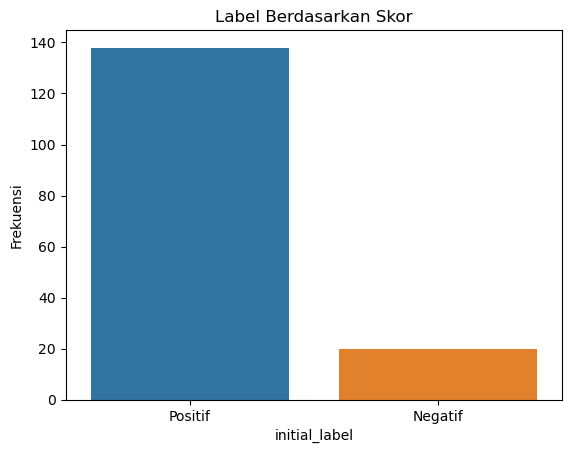

In [16]:
# Creating df for comparing predicted value and y_test 
comparison = pd.DataFrame({'initial_label':y_test, 'predicted_label':predicted})

# Visualizing the label
sns.countplot(data=comparison, x='initial_label')
plt.title('Label Berdasarkan Skor')
plt.ylabel('Frekuensi')
plt.savefig('label-berdasarkan-skor.png')

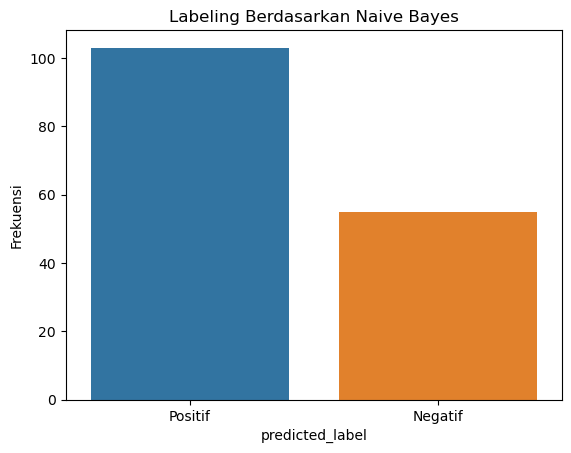

In [17]:
# Visualizing based on the NB
sns.countplot(data=comparison, x='predicted_label')
plt.title('Labeling Berdasarkan Naive Bayes')
plt.ylabel('Frekuensi')
plt.savefig('label-berdasarkan-naive-bayes.png')

In [18]:
# Calculating Accuracy
accuracy = accuracy_score(y_test, predicted)
f1_score = f1_score(y_test, predicted, pos_label='Negatif')
recall = recall_score(y_test, predicted, pos_label='Negatif')
precision = precision_score(y_test, predicted, pos_label='Negatif')
class_report = classification_report(y_test, predicted)
con_matrix = confusion_matrix(y_test, predicted)

In [19]:
!pip install wordcloud

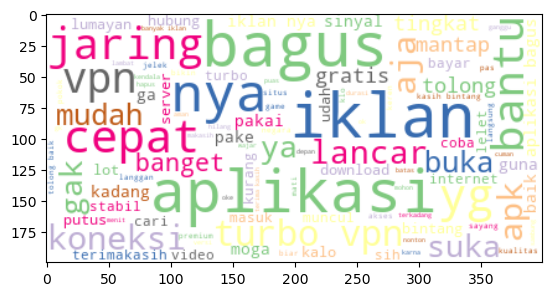

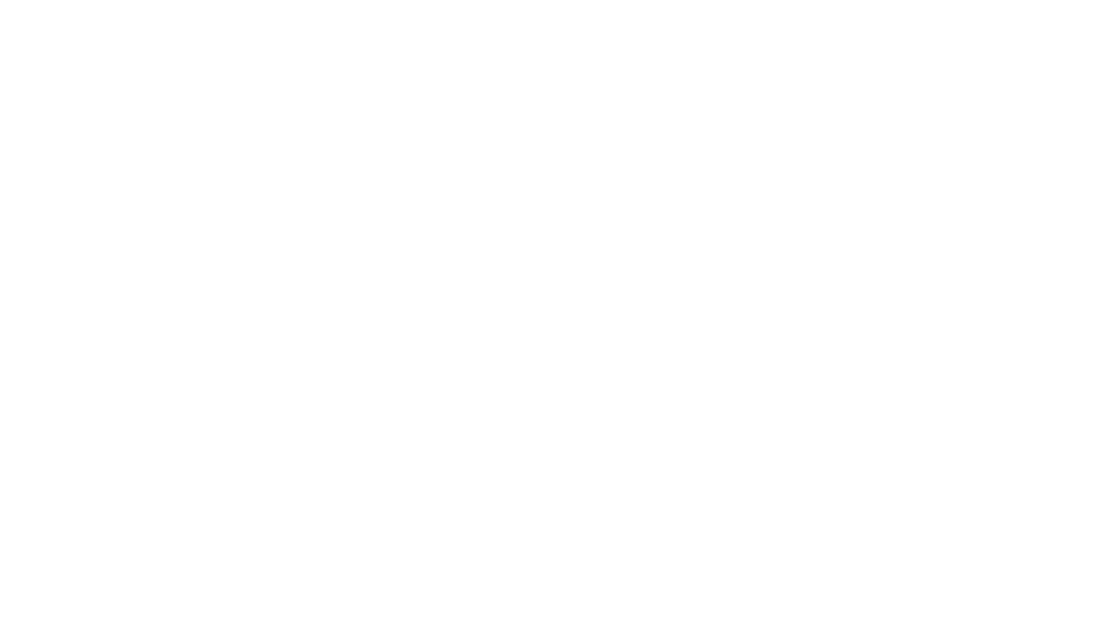

In [20]:
# Visualizing the text
from wordcloud import WordCloud, STOPWORDS

content = ' '.join(review for review in df['content_stem'])

wordcloud = WordCloud(max_font_size=50,
                     max_words=100,
                     background_color='white',
                     colormap='Accent', 
                     stopwords=STOPWORDS).generate(content)
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(figsize=(14,8))
plt.axis('off')
plt.savefig('wordcloud.png')

In [25]:
print('Accuracy dari model adalah:', accuracy)
print('Skor Presisi dari model adalah:', precision)
print('___________________________________')
print('Confusion matrix:\n',con_matrix)
print('Classification Report:\n', class_report)

Accuracy dari model adalah: 0.689873417721519
Skor Presisi dari model adalah: 0.23636363636363636
___________________________________
Confusion matrix:
 [[13  7]
 [42 96]]
Classification Report:
               precision    recall  f1-score   support

     Negatif       0.24      0.65      0.35        20
     Positif       0.93      0.70      0.80       138

    accuracy                           0.69       158
   macro avg       0.58      0.67      0.57       158
weighted avg       0.84      0.69      0.74       158



In [27]:
class_report

'              precision    recall  f1-score   support\n\n     Negatif       0.24      0.65      0.35        20\n     Positif       0.93      0.70      0.80       138\n\n    accuracy                           0.69       158\n   macro avg       0.58      0.67      0.57       158\nweighted avg       0.84      0.69      0.74       158\n'